In [34]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

import cv2
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from prettytable import PrettyTable

In [5]:
path = './caltech101_classification/'

list_of_list = []

for folder in os.listdir(path):
  for image in os.listdir(path + folder):
    list_of_list.append([path + folder + '/' + image, folder])

df = pd.DataFrame(list_of_list, columns = ['image_path', 'object_name'])
df['label'] = df['object_name'].replace(['Motorbikes', 'airplanes', 'schooner'], ['0', '1', '2'])


df.head()

,image_path,object_name,label
0,./caltech101_classification/airplanes/image_04...,airplanes,1
1,./caltech101_classification/airplanes/image_06...,airplanes,1
2,./caltech101_classification/airplanes/image_00...,airplanes,1
3,./caltech101_classification/airplanes/image_00...,airplanes,1
4,./caltech101_classification/airplanes/image_02...,airplanes,1


In [6]:
shapes = [cv2.imread(df.iloc[index, 0]).shape for index in df.index]

shapes

[(171, 420, 3),
 (138, 403, 3),
 (154, 393, 3),
 (187, 393, 3),
 (161, 417, 3),
 (199, 405, 3),
 (159, 394, 3),
 (162, 400, 3),
 (140, 397, 3),
 (138, 400, 3),
 (133, 405, 3),
 (158, 420, 3),
 (167, 399, 3),
 (145, 392, 3),
 (176, 394, 3),
 (176, 395, 3),
 (167, 405, 3),
 (150, 392, 3),
 (187, 401, 3),
 (157, 397, 3),
 (173, 410, 3),
 (156, 412, 3),
 (120, 397, 3),
 (172, 391, 3),
 (191, 399, 3),
 (118, 394, 3),
 (145, 404, 3),
 (146, 393, 3),
 (148, 401, 3),
 (146, 394, 3),
 (142, 397, 3),
 (143, 405, 3),
 (151, 401, 3),
 (152, 394, 3),
 (191, 393, 3),
 (138, 404, 3),
 (136, 392, 3),
 (132, 398, 3),
 (142, 405, 3),
 (157, 406, 3),
 (144, 404, 3),
 (143, 396, 3),
 (160, 395, 3),
 (130, 393, 3),
 (155, 394, 3),
 (180, 393, 3),
 (164, 395, 3),
 (168, 398, 3),
 (143, 403, 3),
 (128, 394, 3),
 (162, 406, 3),
 (138, 403, 3),
 (151, 399, 3),
 (142, 400, 3),
 (142, 410, 3),
 (157, 396, 3),
 (163, 412, 3),
 (238, 392, 3),
 (184, 401, 3),
 (147, 393, 3),
 (148, 395, 3),
 (143, 402, 3),
 (142, 3

In [7]:
# shapes of images are different, so resize to 128 x 128 x 3

Image_Width = 128
Image_Height = 128
Image_Size = (Image_Width, Image_Height)
Image_Channels = 3
batch_size = 16

In [13]:
train, test = train_test_split(df, test_size = .2, stratify = df['label'], random_state = 0)

train.shape, test.shape

((1328, 3), (333, 3))

In [14]:
train_datagen = ImageDataGenerator(rotation_range = 15, 
                                   rescale = 1./255, 
                                   shear_range = 0.1, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True, 
                                   width_shift_range = 0.1, 
                                   height_shift_range = 0.1)
train_generator = train_datagen.flow_from_dataframe(train, 
                                                    x_col = 'image_path', 
                                                    y_col = 'label', 
                                                    target_size = Image_Size, 
                                                    class_mode = 'sparse', 
                                                    batch_size = batch_size)

test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_dataframe(test, 
                                              x_col = 'image_path', 
                                              y_col = 'label', 
                                              target_size = Image_Size, 
                                              class_mode = 'sparse', 
                                              batch_size = batch_size)

Found 1328 validated image filenames belonging to 3 classes.
Found 333 validated image filenames belonging to 3 classes.


In [15]:
total_train = train.shape[0]
total_test = test.shape[0]

total_train, total_test

(1328, 333)

In [22]:
reduce_lr = ReduceLROnPlateau(monitor = "val_accuracy", 
                              factor = .4642, 
                              patience = 3, 
                              verbose = 1, 
                              min_delta = 0.001, 
                              mode = "max")
earlystop = EarlyStopping(monitor = "val_accuracy", 
                          patience = 10, 
                          verbose = 1, 
                          mode = "max", 
                          restore_best_weights = True
                          )

# model1

conv2d + batchnormalization + relu activation + max pool + dropout + dense layer

In [17]:
def model_1():
  tf.keras.backend.clear_session()
  model = Sequential()
  model.add(Conv2D(32, (3, 3), input_shape = (Image_Width, Image_Height, Image_Channels)))
  model.add(BatchNormalization())
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3)))
  model.add(BatchNormalization())
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(128, (3, 3)))
  model.add(BatchNormalization())
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(64))
  model.add(Dropout(0.5))
  model.add(Dense(3, activation = 'softmax'))

  model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  return model

In [18]:
model1 = model_1()
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        1

In [19]:
callbacks_list = [reduce_lr, earlystop]
epochs = 150
history = model1.fit(train_generator, 
                    epochs = epochs, 
                    validation_data = test_generator, 
                    validation_steps = total_test//batch_size, 
                    steps_per_epoch = total_train//batch_size, 
                    callbacks = callbacks_list)

Epoch 1/150
83/83 [==============================] - 16s 90ms/step - loss: 9.2064 - accuracy: 0.8456 - val_loss: 45.1346 - val_accuracy: 0.4875 - lr: 0.0010
Epoch 2/150
83/83 [==============================] - 7s 83ms/step - loss: 4.7364 - accuracy: 0.9081 - val_loss: 54.5070 - val_accuracy: 0.4625 - lr: 0.0010
Epoch 3/150
83/83 [==============================] - 7s 85ms/step - loss: 4.8400 - accuracy: 0.9014 - val_loss: 99.9467 - val_accuracy: 0.4750 - lr: 0.0010
Epoch 4/150
83/83 [==============================] - 7s 84ms/step - loss: 3.7179 - accuracy: 0.9285 - val_loss: 28.7891 - val_accuracy: 0.5156 - lr: 0.0010
Epoch 5/150
83/83 [==============================] - 7s 84ms/step - loss: 2.6680 - accuracy: 0.9398 - val_loss: 10.3801 - val_accuracy: 0.7750 - lr: 0.0010
Epoch 6/150
83/83 [==============================] - 8s 95ms/step - loss: 3.1877 - accuracy: 0.9285 - val_loss: 2.0790 - val_accuracy: 0.9281 - lr: 0.0010
Epoch 7/150
83/83 [==============================] - 8s 94ms/ste

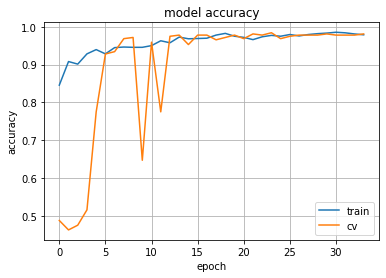

In [20]:
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'cv')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.grid()
plt.show()

# model2

conv2d + relu activation + max pool + dense layer + dropout

In [21]:
def model_2():
  tf.keras.backend.clear_session()
  model = Sequential()
  model.add(Conv2D(32, (3, 3), input_shape = (Image_Width, Image_Height, Image_Channels)))
  #model.add(BatchNormalization())
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  #model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3)))
  #model.add(BatchNormalization())
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  #model.add(Dropout(0.25))

  model.add(Conv2D(128, (3, 3)))
  #model.add(BatchNormalization())
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  #model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(64))
  model.add(Dropout(0.5))
  model.add(Dense(3, activation = 'softmax'))

  model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  return model

In [23]:
model2 = model_2()
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 activation (Activation)     (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 61, 61, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [24]:
callbacks_list = [reduce_lr, earlystop]
epochs = 150
history = model2.fit(train_generator, 
                    epochs = epochs, 
                    validation_data = test_generator, 
                    validation_steps = total_test//batch_size, 
                    steps_per_epoch = total_train//batch_size, 
                    callbacks = callbacks_list)

Epoch 1/150
83/83 [==============================] - 8s 86ms/step - loss: 0.5234 - accuracy: 0.7997 - val_loss: 0.1470 - val_accuracy: 0.9688 - lr: 0.0010
Epoch 2/150
83/83 [==============================] - 7s 84ms/step - loss: 0.2036 - accuracy: 0.9375 - val_loss: 0.1372 - val_accuracy: 0.9719 - lr: 0.0010
Epoch 3/150
83/83 [==============================] - 7s 84ms/step - loss: 0.1782 - accuracy: 0.9420 - val_loss: 0.1253 - val_accuracy: 0.9719 - lr: 0.0010
Epoch 4/150
83/83 [==============================] - 7s 82ms/step - loss: 0.1087 - accuracy: 0.9729 - val_loss: 0.1783 - val_accuracy: 0.9438 - lr: 0.0010
Epoch 5/150
83/83 [==============================] - 7s 84ms/step - loss: 0.1283 - accuracy: 0.9593 - val_loss: 0.1331 - val_accuracy: 0.9781 - lr: 0.0010
Epoch 6/150
83/83 [==============================] - 7s 83ms/step - loss: 0.0981 - accuracy: 0.9714 - val_loss: 0.0578 - val_accuracy: 0.9781 - lr: 0.0010
Epoch 7/150
83/83 [==============================] - 8s 100ms/step - l

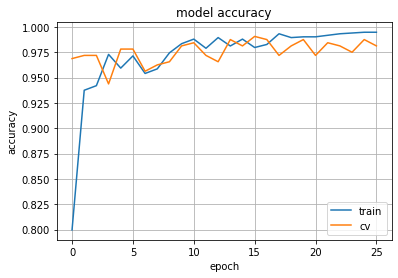

In [25]:
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'cv')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.grid()
plt.show()

# model3

conv2d + relu activation + max pool + output dense layer 

In [28]:
def model_3():
  tf.keras.backend.clear_session()
  model = Sequential()
  model.add(Conv2D(32, (3, 3), input_shape = (Image_Width, Image_Height, Image_Channels)))
  #model.add(BatchNormalization())
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  #model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3)))
  #model.add(BatchNormalization())
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  #model.add(Dropout(0.25))

  model.add(Conv2D(128, (3, 3)))
  #model.add(BatchNormalization())
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  #model.add(Dropout(0.25))
  
  model.add(Conv2D(3, (14, 14)))
  model.add(Activation("relu"))
  model.add(Flatten())
  #model.add(Dense(64))
  #model.add(Dropout(0.5))
  model.add(Dense(3, activation = 'softmax'))

  model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  return model

In [29]:
model3 = model_3()
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 activation (Activation)     (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 61, 61, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [30]:
callbacks_list = [reduce_lr, earlystop]
epochs = 150
history = model3.fit(train_generator, 
                    epochs = epochs, 
                    validation_data = test_generator, 
                    validation_steps = total_test//batch_size, 
                    steps_per_epoch = total_train//batch_size, 
                    callbacks = callbacks_list)

Epoch 1/150
83/83 [==============================] - 8s 92ms/step - loss: 0.7625 - accuracy: 0.7636 - val_loss: 0.6936 - val_accuracy: 0.8031 - lr: 0.0010
Epoch 2/150
83/83 [==============================] - 7s 84ms/step - loss: 0.5856 - accuracy: 0.9089 - val_loss: 0.5828 - val_accuracy: 0.9219 - lr: 0.0010
Epoch 3/150
83/83 [==============================] - 7s 83ms/step - loss: 0.5562 - accuracy: 0.9089 - val_loss: 0.5640 - val_accuracy: 0.9250 - lr: 0.0010
Epoch 4/150
83/83 [==============================] - 7s 84ms/step - loss: 0.4988 - accuracy: 0.9300 - val_loss: 0.5330 - val_accuracy: 0.9281 - lr: 0.0010
Epoch 5/150
83/83 [==============================] - 7s 84ms/step - loss: 0.4530 - accuracy: 0.9352 - val_loss: 0.4750 - val_accuracy: 0.9344 - lr: 0.0010
Epoch 6/150
83/83 [==============================] - 7s 83ms/step - loss: 0.4376 - accuracy: 0.9345 - val_loss: 0.4177 - val_accuracy: 0.9438 - lr: 0.0010
Epoch 7/150
83/83 [==============================] - 7s 82ms/step - lo

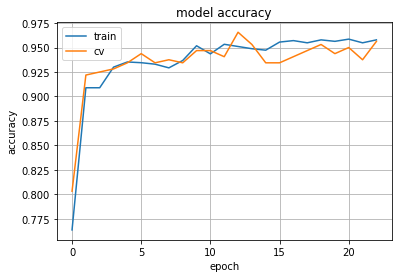

In [31]:
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'cv')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.grid()
plt.show()

# model2

conv2d + batchnormalization + relu activation + max pool + dropout + output dense layer 

In [32]:
def model_4():
  tf.keras.backend.clear_session()
  model = Sequential()
  model.add(Conv2D(32, (3, 3), input_shape = (Image_Width, Image_Height, Image_Channels)))
  model.add(BatchNormalization())
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3)))
  model.add(BatchNormalization())
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(128, (3, 3)))
  model.add(BatchNormalization())
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(Dropout(0.25))
  
  model.add(Conv2D(3, (14, 14)))
  model.add(Activation("relu"))
  model.add(Flatten())
  #model.add(Dense(64))
  #model.add(Dropout(0.5))
  model.add(Dense(3, activation = 'softmax'))

  model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  return model

In [33]:
model4 = model_4()
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        1

In [34]:
callbacks_list = [reduce_lr, earlystop]
epochs = 150
history = model4.fit(train_generator, 
                    epochs = epochs, 
                    validation_data = test_generator, 
                    validation_steps = total_test//batch_size, 
                    steps_per_epoch = total_train//batch_size, 
                    callbacks = callbacks_list)

Epoch 1/150
83/83 [==============================] - 8s 86ms/step - loss: 1.3453 - accuracy: 0.4789 - val_loss: 1.0678 - val_accuracy: 0.4781 - lr: 0.0010
Epoch 2/150
83/83 [==============================] - 7s 86ms/step - loss: 1.0511 - accuracy: 0.4819 - val_loss: 1.0349 - val_accuracy: 0.4750 - lr: 0.0010
Epoch 3/150
83/83 [==============================] - 8s 91ms/step - loss: 1.0206 - accuracy: 0.4819 - val_loss: 1.0077 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 4/150
83/83 [==============================] - 7s 89ms/step - loss: 0.9945 - accuracy: 0.4819 - val_loss: 0.9836 - val_accuracy: 0.4875 - lr: 0.0010
Epoch 5/150
83/83 [==============================] - 10s 119ms/step - loss: 0.9720 - accuracy: 0.4819 - val_loss: 0.9616 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 6/150
83/83 [==============================] - 10s 122ms/step - loss: 0.9529 - accuracy: 0.4684 - val_loss: 0.9462 - val_accuracy: 0.4812 - lr: 0.0010
Epoch 7/150
83/83 [==============================] - ETA: 0s - los

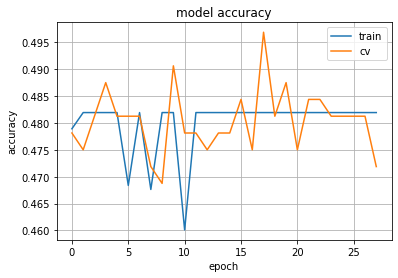

In [35]:
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'cv')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.grid()
plt.show()

In [35]:
p = PrettyTable(['model', 'parameters', 'test accuracy'])

p.add_row(['model1', '1,700,035', '98.44 %'])
p.add_row(['model2', '1,699,139', '99.06 %'])
p.add_row(['model3', '168,527', '96.56 %'])
p.add_row(['model4', '169,423', '49.69 %'])

print(p)

+--------+------------+---------------+
| model  | parameters | test accuracy |
+--------+------------+---------------+
| model1 | 1,700,035  |    98.44 %    |
| model2 | 1,699,139  |    99.06 %    |
| model3 |  168,527   |    96.56 %    |
| model4 |  169,423   |    49.69 %    |
+--------+------------+---------------+
